# World Happiness Report

Problem Statement:
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions.
Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset.

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset. 

Note: You can find the dataset in the link below.
Downlaod Files:
•	https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv
•	https://github.com/dsrscientist/DSData



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv(r"Z:\ML Datasets\Happiness.csv")

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# EDA

In [7]:
#total countries

total_countries = (df.groupby('Region'))['Country'].count()
print(total_countries)

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
Name: Country, dtype: int64


<AxesSubplot:xlabel='Country', ylabel='Dystopia Residual'>

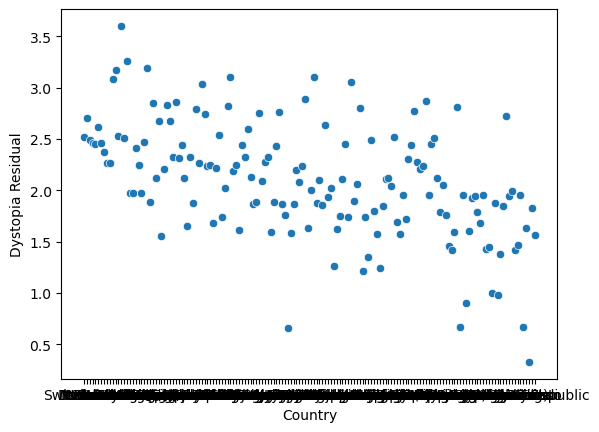

In [8]:
sns.scatterplot(data=df, x='Country', y='Dystopia Residual')

<AxesSubplot:xlabel='Happiness Score', ylabel='Dystopia Residual'>

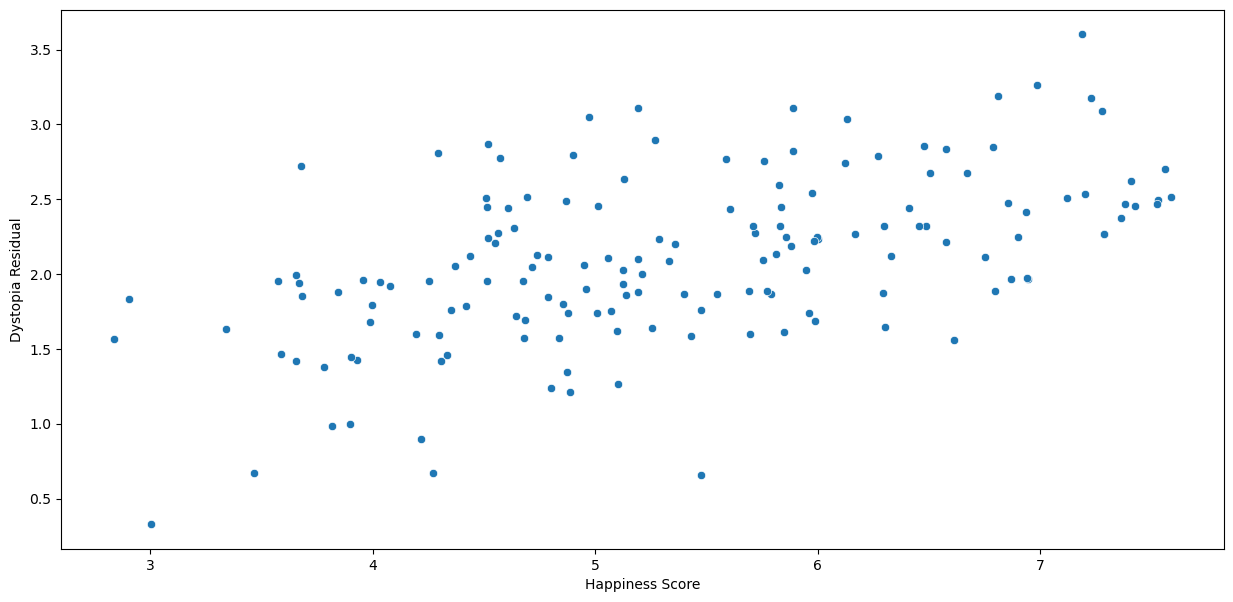

In [9]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='Happiness Score',y='Dystopia Residual')

There's a positive relationship between the Happiness Score and the target column.

<AxesSubplot:xlabel='Happiness Rank', ylabel='Dystopia Residual'>

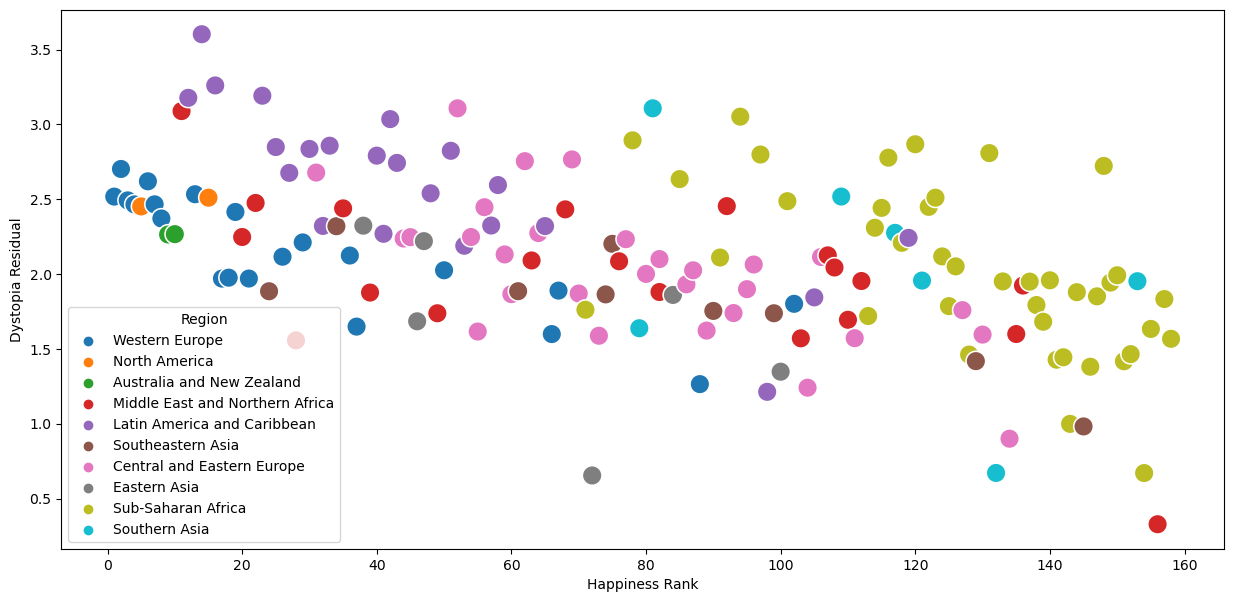

In [10]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='Happiness Rank', y='Dystopia Residual', hue='Region',s=200)

There's a negative relationship between the Happiness Rank and the target column.

<AxesSubplot:xlabel='Standard Error', ylabel='Dystopia Residual'>

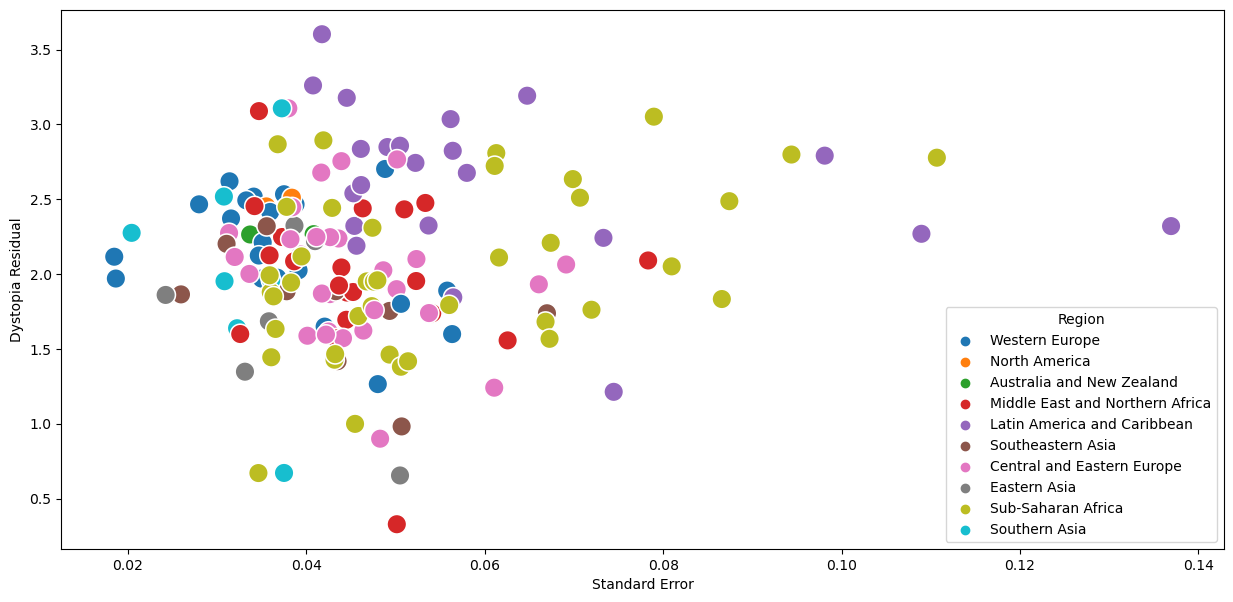

In [11]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='Standard Error', y='Dystopia Residual', hue='Region',s=200)

There's kind of null/no relationship between the Standard Error and the target column.

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Dystopia Residual'>

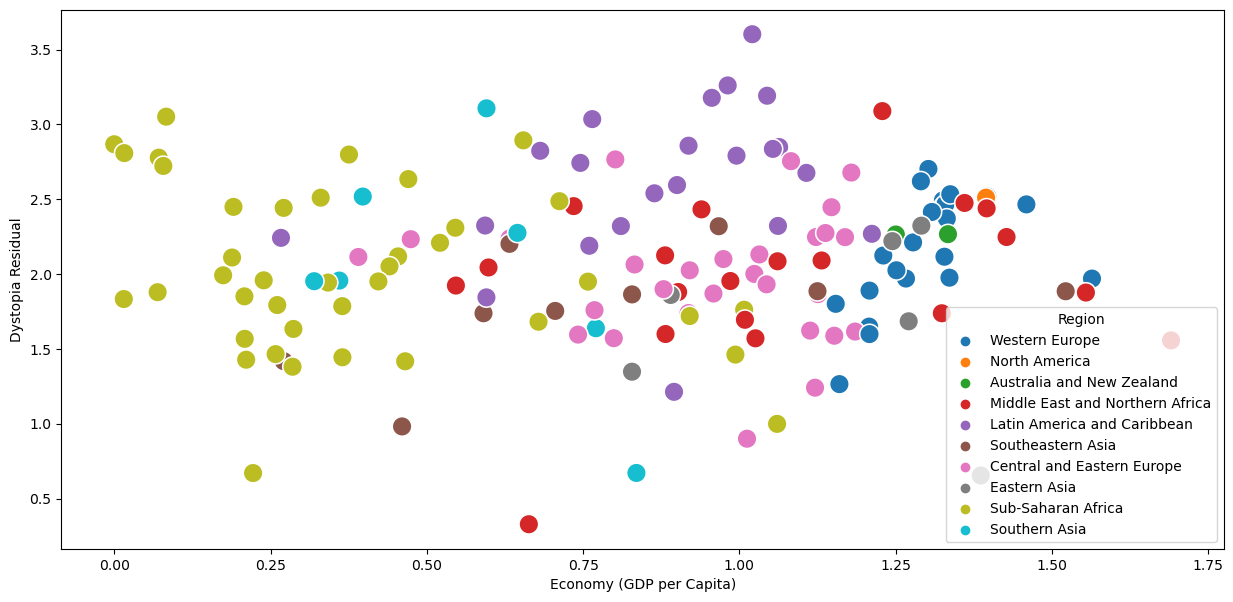

In [12]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='Economy (GDP per Capita)' , y='Dystopia Residual', hue='Region',s=200)

There's a slightly positive relationship between the Economy (GDP per Capita) and the target column.

<AxesSubplot:xlabel='Family', ylabel='Dystopia Residual'>

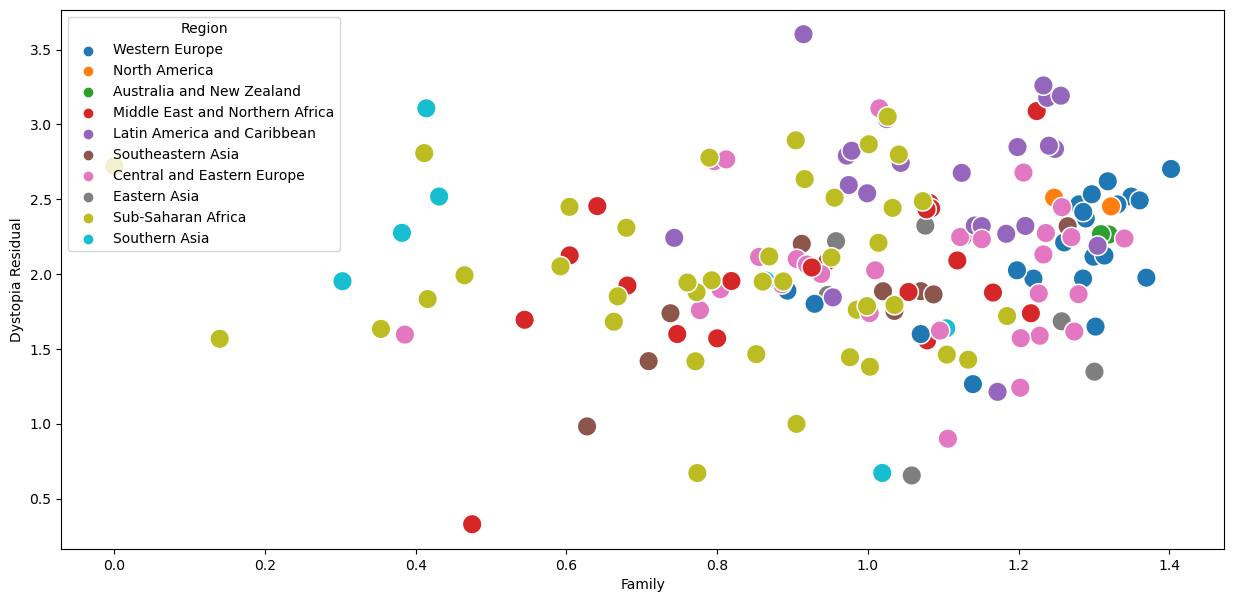

In [13]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='Family', y='Dystopia Residual', hue='Region',s=200)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Dystopia Residual'>

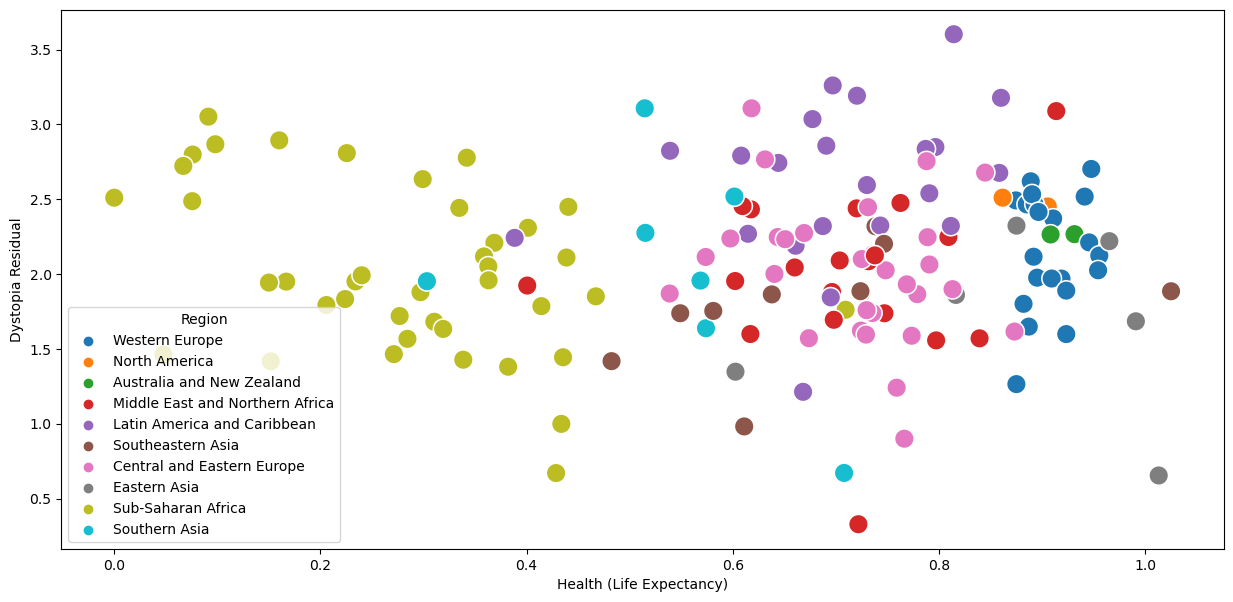

In [14]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='Health (Life Expectancy)', y='Dystopia Residual', hue='Region',s=200)

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Dystopia Residual'>

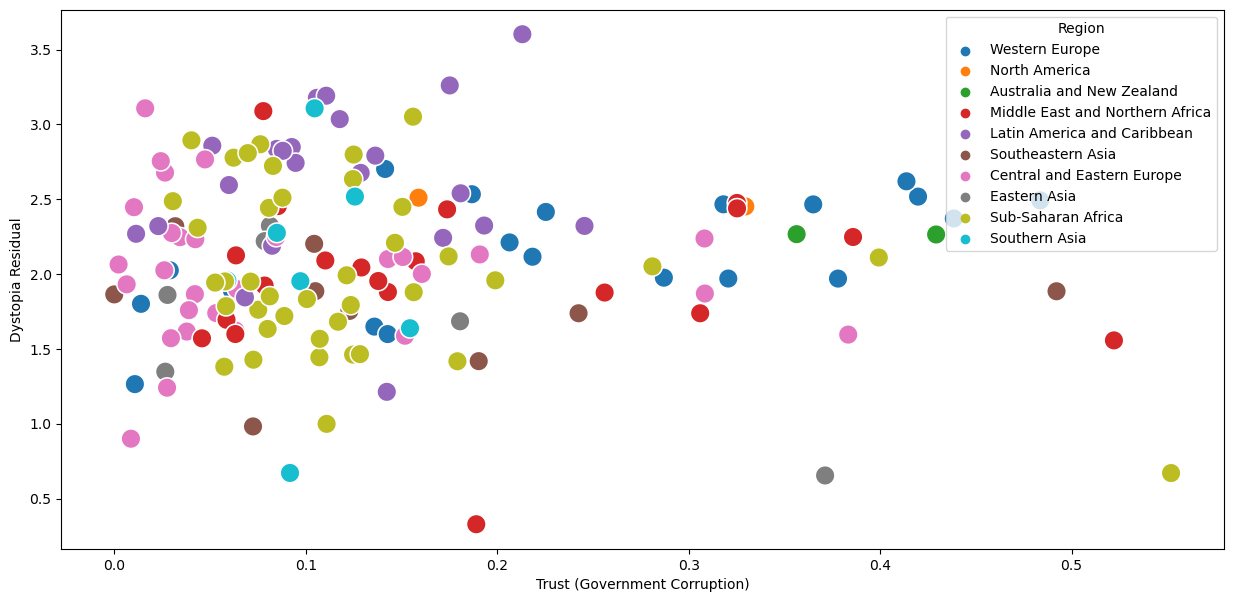

In [15]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='Trust (Government Corruption)', y='Dystopia Residual', hue='Region',s=200)

<AxesSubplot:xlabel='Freedom', ylabel='Dystopia Residual'>

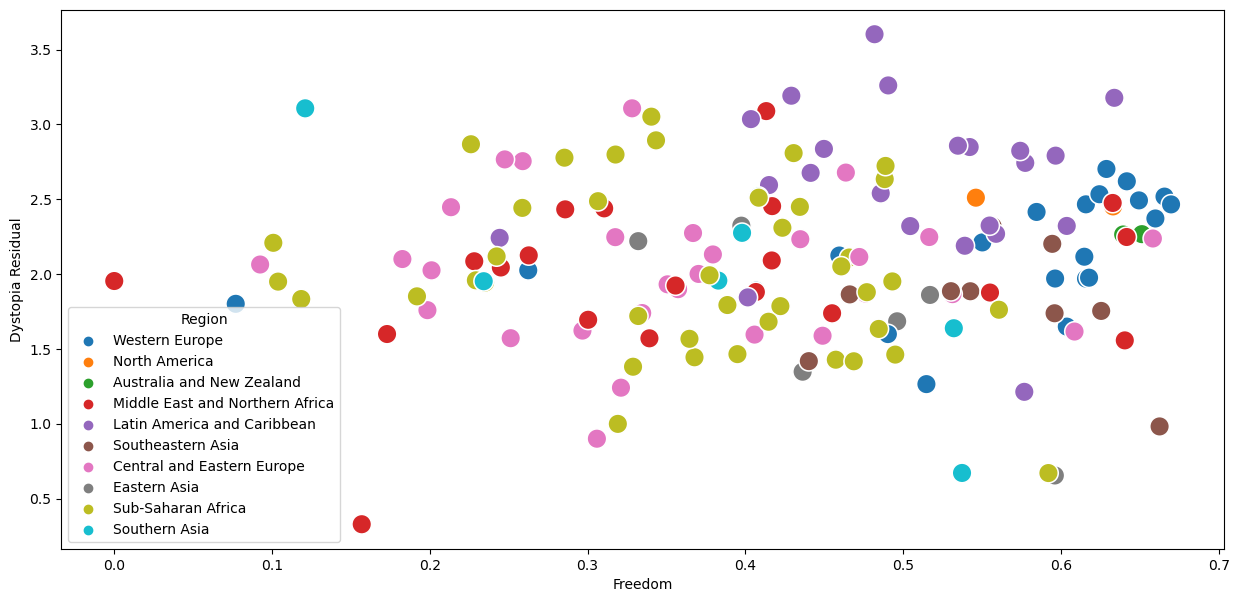

In [16]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='Freedom', y='Dystopia Residual', hue='Region',s=200)

<AxesSubplot:xlabel='Generosity', ylabel='Dystopia Residual'>

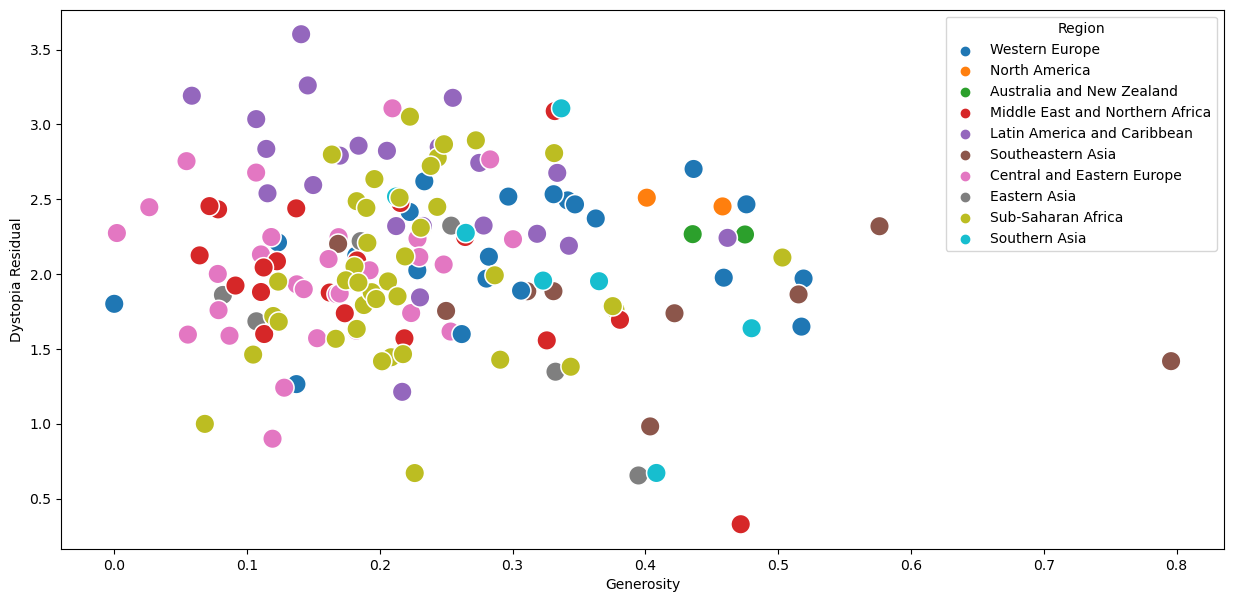

In [17]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='Generosity', y='Dystopia Residual', hue='Region',s=200)

(array([ 1.,  1.,  2.,  2.,  1.,  3.,  8., 12., 14., 23., 19., 17., 15.,
        13.,  9.,  9.,  5.,  3.,  0.,  1.]),
 array([0.32858 , 0.492258, 0.655936, 0.819614, 0.983292, 1.14697 ,
        1.310648, 1.474326, 1.638004, 1.801682, 1.96536 , 2.129038,
        2.292716, 2.456394, 2.620072, 2.78375 , 2.947428, 3.111106,
        3.274784, 3.438462, 3.60214 ]),
 <BarContainer object of 20 artists>)

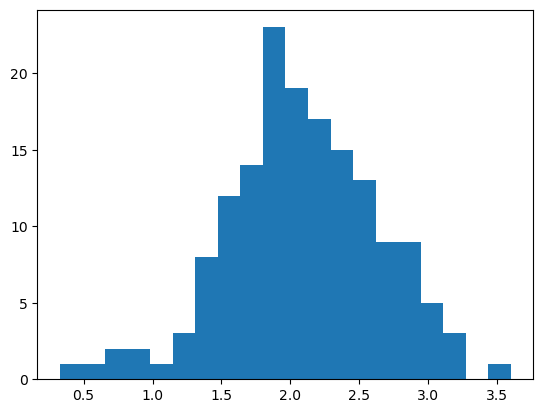

In [18]:
plt.hist(df['Dystopia Residual'], bins=20)

# Correlation 

In [19]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

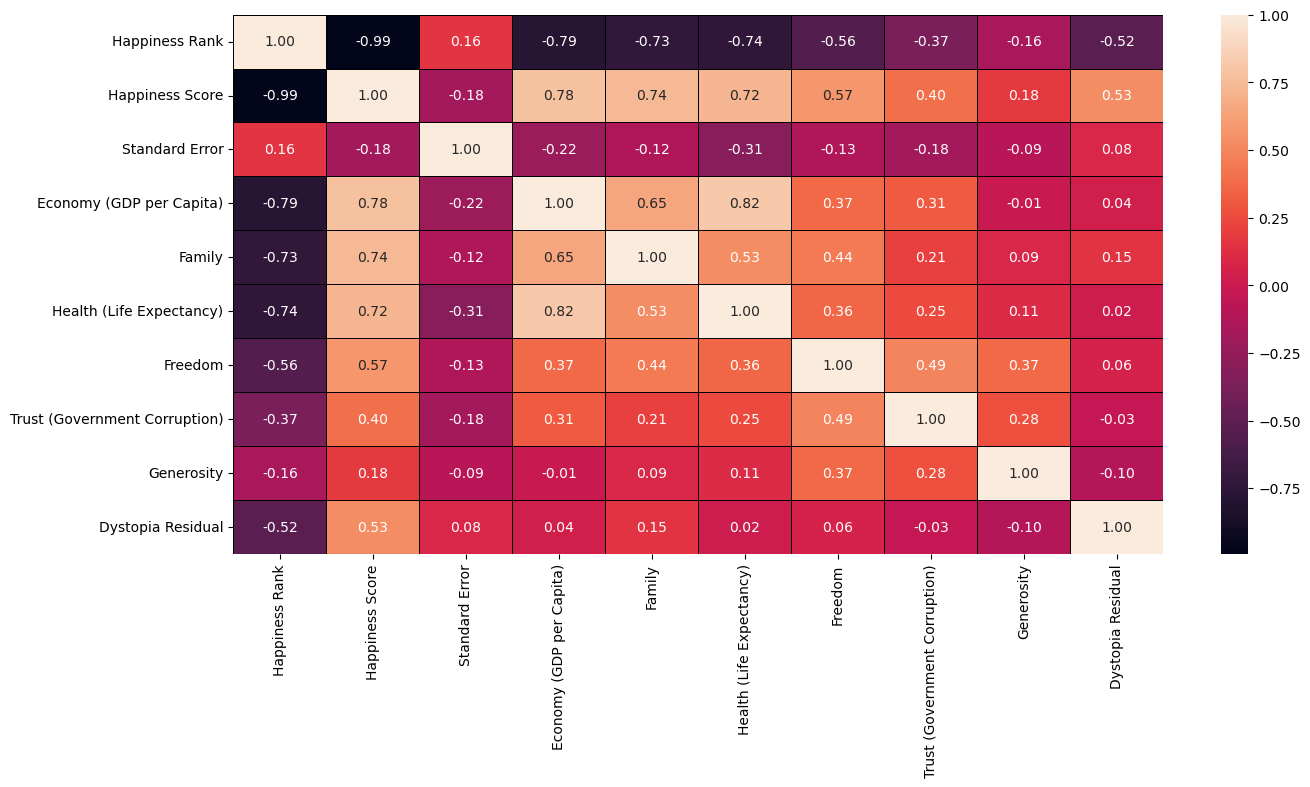

In [20]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor="black", fmt='.2f')

# Describing dataset

In [21]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# Checking outliers 

In [22]:
df1=df.drop(['Country','Region'],axis=1)
df1

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Happiness Rank                      AxesSubplot(0.125,0.53;0.133621x0.35)
Happiness Score                  AxesSubplot(0.285345,0.53;0.133621x0.35)
Standard Error                    AxesSubplot(0.44569,0.53;0.133621x0.35)
Economy (GDP per Capita)         AxesSubplot(0.606034,0.53;0.133621x0.35)
Family                           AxesSubplot(0.766379,0.53;0.133621x0.35)
Health (Life Expectancy)            AxesSubplot(0.125,0.11;0.133621x0.35)
Freedom                          AxesSubplot(0.285345,0.11;0.133621x0.35)
Trust (Government Corruption)     AxesSubplot(0.44569,0.11;0.133621x0.35)
Generosity                       AxesSubplot(0.606034,0.11;0.133621x0.35)
Dystopia Residual                AxesSubplot(0.766379,0.11;0.133621x0.35)
dtype: object

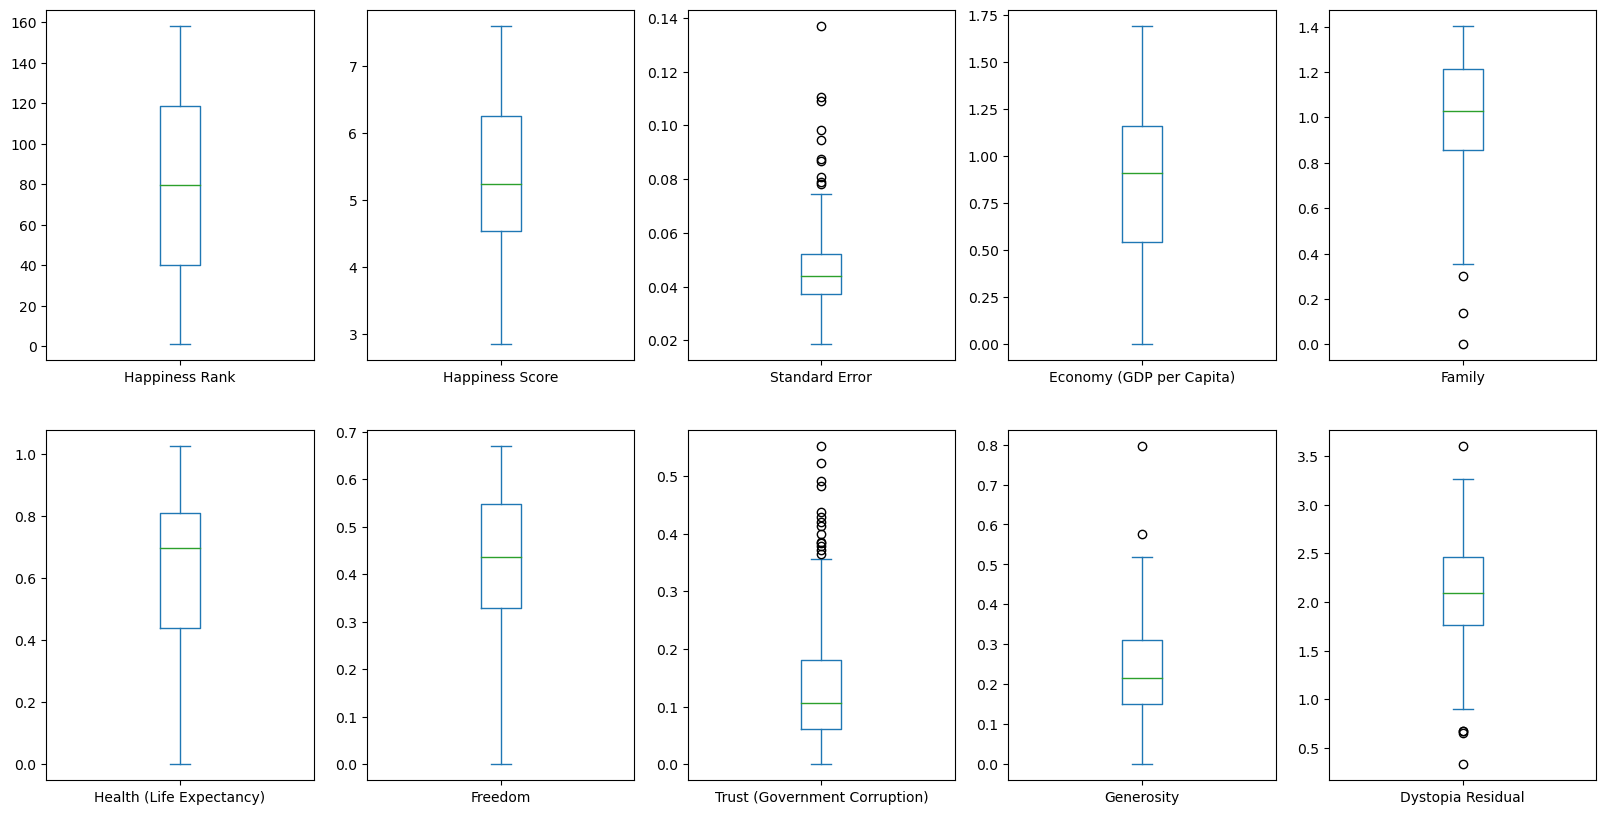

In [23]:
df.plot(kind = 'box', subplots = True, layout = (2,5), figsize = (20,10))

In [24]:
#Removing outliers using z score

from scipy.stats import zscore
z = np.abs(zscore(df1))
z.shape

(158, 10)

In [25]:
print(np.where(z<3))

(array([  0,   0,   0, ..., 157, 157, 157], dtype=int64), array([0, 1, 2, ..., 7, 8, 9], dtype=int64))


In [26]:
#creating new dataframe after removing outliers

df2=df1[(z<3).all(axis=1)]
print(df1.shape)
print(df2.shape)

(158, 10)
(149, 10)


In [27]:
#Percentage of data loss = [(total - after removed skewness)/total] * 100

loss_percent=((158-149)/158)*100
print(loss_percent)

5.69620253164557


# Skewness :

In [28]:
df2.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

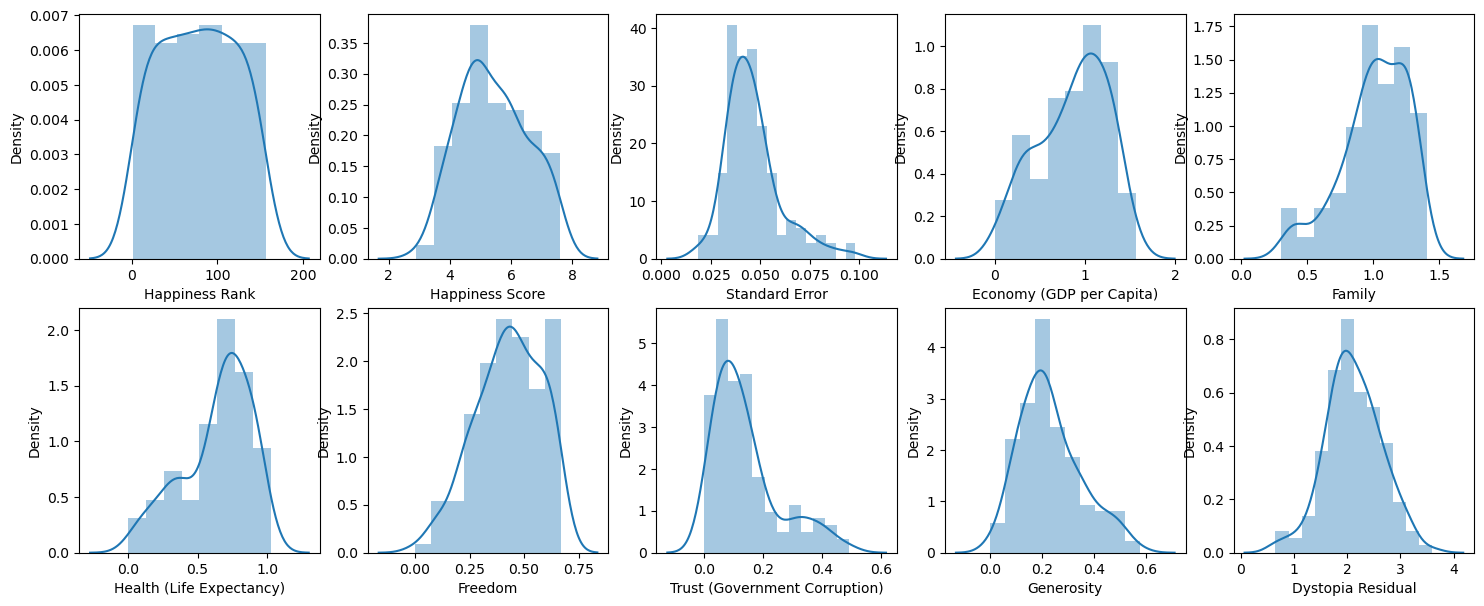

In [29]:
plt.figure(figsize=(18,7))
for i, column in enumerate(df2.columns, 1):
    plt.subplot(2,5,i)
    sns.distplot(df2[column])

# Transforming data to remove skewness 

In [30]:
df2.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,77.617450,5.429611,0.046241,0.862163,1.008623,0.638624,0.427449,0.140405,0.231500,2.120862
std,44.854208,1.111256,0.014043,0.387975,0.251890,0.245937,0.150864,0.113385,0.119897,0.525654
min,1.000000,2.905000,0.018480,0.000000,0.302850,0.000000,0.000000,0.000000,0.000000,0.654290
25%,39.000000,4.610000,0.036800,0.593250,0.885880,0.467210,0.328180,0.061460,0.142720,1.792930
50%,78.000000,5.268000,0.043610,0.920490,1.035160,0.703800,0.434500,0.107130,0.213330,2.100170
75%,115.000000,6.295000,0.050690,1.159910,1.223930,0.814440,0.546040,0.175210,0.300300,2.465310
max,157.000000,7.587000,0.098110,1.563910,1.402230,1.025250,0.669730,0.492100,0.576300,3.602140


In [31]:
X = df2.drop(['Dystopia Residual'], axis = 1)
Y = df2["Dystopia Residual"]

#As we can see there are multiple 0 values as minimum, hence we cannot use boxcox here, we will have to use yeo-johnson to power transform data.

In [32]:
from sklearn.preprocessing import power_transform
X = power_transform(X ,method='yeo-johnson')
X

array([[-2.05151352,  1.82591163, -0.95033703, ...,  1.75498234,
         1.81762514,  0.65957855],
       [-1.99584442,  1.80625026,  0.37856182, ...,  1.44218195,
         0.32967608,  1.56260401],
       [-1.94524081,  1.7804847 , -1.04140135, ...,  1.6160368 ,
         1.95339957,  0.97722591],
       ...,
       [ 1.53128908, -1.78998689, -1.32081011, ..., -1.26539516,
        -0.19284339,  1.13425805],
       [ 1.56626337, -2.05390645, -0.69272644, ...,  0.31812329,
        -0.4344978 , -0.31207994],
       [ 1.60111233, -2.56623507,  2.17876604, ..., -1.84989335,
        -0.14727363, -0.17248608]])

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-2.05151352,  1.82591163, -0.95033703, ...,  1.75498234,
         1.81762514,  0.65957855],
       [-1.99584442,  1.80625026,  0.37856182, ...,  1.44218195,
         0.32967608,  1.56260401],
       [-1.94524081,  1.7804847 , -1.04140135, ...,  1.6160368 ,
         1.95339957,  0.97722591],
       ...,
       [ 1.53128908, -1.78998689, -1.32081011, ..., -1.26539516,
        -0.19284339,  1.13425805],
       [ 1.56626337, -2.05390645, -0.69272644, ...,  0.31812329,
        -0.4344978 , -0.31207994],
       [ 1.60111233, -2.56623507,  2.17876604, ..., -1.84989335,
        -0.14727363, -0.17248608]])

In [34]:
X = pd.DataFrame(X) 

# Train Test Split :

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [36]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [37]:
#Linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))
cvs = cross_val_score(lr, X, Y, cv=None)
cvs.mean()

MAE: 0.06952618806351803
MSE: 0.007806415635246211
RMSE: 0.08835392257985047
r2score: 0.9715949524335097


0.8114899818010584

In [38]:
#DecisionTree Regressor model

from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
pred=dtr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))
cvs = cross_val_score(dtr, X, Y, cv=None)
cvs.mean()

MAE: 0.34435799999999994
MSE: 0.18401043944000003
RMSE: 0.4289643801529447
r2score: 0.330444914894781


-1.1928855013173845

In [39]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,Y_train)
pred=rdr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))
cvs = cross_val_score(rdr, X, Y, cv=None)
cvs.mean()

MAE: 0.24896354000000015
MSE: 0.10724748388676406
RMSE: 0.3274866163475449
r2score: 0.6097607373817655


-0.48067932765708754

In [40]:
#Support Vector Regressor model

from sklearn.tree import DecisionTreeRegressor
svr=DecisionTreeRegressor()
svr.fit(X_train,Y_train)
pred=svr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))
cvs = cross_val_score(svr, X, Y, cv=None)
cvs.mean()

MAE: 0.34440400000000004
MSE: 0.17730822799333337
RMSE: 0.4210798356527339
r2score: 0.3548321168884445


-1.4848274902155967

# Hyperparamtere Tuning :

# Ridge : to handle overfitting condition

In [41]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [42]:
ridge = Ridge()

In [43]:
param_grid = {'alpha':[0.001, 0.1, 1,3,6,9,11,16,26,55,80,93,]} #it has only 1 parameter "alpha"

In [44]:
ridgecv = GridSearchCV(ridge, param_grid, scoring ='neg_mean_squared_error', cv=5)
ridgecv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.1, 1, 3, 6, 9, 11, 16, 26, 55, 80,
                                   93]},
             scoring='neg_mean_squared_error')

In [45]:
ridgecv.best_params_

{'alpha': 0.1}

In [46]:
ridgecv.best_score_

-0.011189875620039494

In [47]:
ridgecv.predict(X_test)

array([2.35320242, 2.27764269, 2.31857797, 2.00212791, 2.16526101,
       2.85291512, 2.52389759, 1.4584634 , 0.67869842, 2.0106449 ,
       1.67176826, 2.33518275, 2.31633333, 2.19430653, 2.28048027,
       2.16693527, 1.50906908, 1.6095754 , 2.662886  , 1.90324262,
       2.65609591, 1.29755678, 2.67101423, 1.85611247, 0.8879636 ,
       1.40577229, 2.27418968, 1.88820161, 2.67048598, 2.34201991])

In [48]:
pred = ridgecv.predict(X_test)

In [49]:
print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))
cvs = cross_val_score(ridge, X, Y, cv=None)
cvs.mean()

MAE: 0.06957449890104776
MSE: 0.007726410790651297
RMSE: 0.08790000449744753
r2score: 0.9718860644524505


0.8890035677560967

# Lasso : for handling overfitting & automatic feature selection

In [50]:
from sklearn.linear_model import Lasso

In [51]:
lasso = Lasso()

In [52]:
param_grid = {'alpha':[0.001, 0.1, 1,3,6,9,11,16,26,55,80,93,]}
lassocv = GridSearchCV(lasso, param_grid, scoring ='neg_mean_squared_error', cv=5)
lassocv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.1, 1, 3, 6, 9, 11, 16, 26, 55, 80,
                                   93]},
             scoring='neg_mean_squared_error')

In [53]:
print(lassocv.best_params_)

{'alpha': 0.001}


In [54]:
print(lassocv.best_score_)

-0.011183068099948096


In [55]:
lassocv.predict(X_test)

array([2.35153703, 2.27857816, 2.31356204, 2.00299861, 2.16236202,
       2.84897106, 2.52127696, 1.4645748 , 0.69167423, 2.01107845,
       1.67147626, 2.33578831, 2.31532746, 2.19838762, 2.28006839,
       2.16680682, 1.5122434 , 1.61266697, 2.65826026, 1.90236657,
       2.65243188, 1.29874398, 2.67143912, 1.85389072, 0.89436839,
       1.41105013, 2.26902177, 1.89007122, 2.66860379, 2.34333358])

In [56]:
pred=lassocv.predict(X_test)

In [57]:
print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))

cvs = cross_val_score(lasso, X, Y, cv=None)
cvs.mean()

MAE: 0.07020376895017483
MSE: 0.007750897335595528
RMSE: 0.08803918068448574
r2score: 0.9717969657538443


-0.8011776399974007

# Saving the model :

In [58]:
import pickle
filename = 'World Happiness Score.pkl'
pickle.dump(lr, open(filename, 'wb'))